## importing all the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mppp.csv')

In [3]:
df.head(2)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core


#### **Table Content** -> `mobile_phones`:

- `name`: the name of the mobile phone
- `rating`: the ratings given to the phone, ranging from 0 to 5
- `spec_score`: the score given to the phone based on its specifications, ranging from 0 to 100
- `no_of_sim`: indicates whether the phone is dual SIM, has 3G, 4G, 5G, or VoLTE
- `ram`: information about the RAM of the phone
- `battery`: information about the battery specification of the phone
- `display`: information about the screen size of the phone
- `camera`: information about the camera, including both rear and front
- `external_memory`: information about whether the device supports external memory and the capacity
- `android_version`: the Android version of the phone
- `price`: the price of the phone
- `company`: the company to which the phone belongs
- `inbuilt_memory`: information about the inbuilt memory of the phone
- `fast_charging`: indicates whether the device supports fast charging and the charging capacity
- `screen_resolution`: the screen resolution of the phone
- `processor`: information about the processor of the phone
- `processor_name`: the name of the processor


## Understanding Data by Columns Through Manual Observation

1. **name**: Remove company name and RAM/ROM information.
   - dtype: `object`

2. **rating**: The dtype is correct.
   - dtype: `float`

3. **spec_score**: The dtype is correct.
   - dtype: `int`

4. **no_of_sim**: This feature contains multiple pieces of information and should be split into two columns for better range type analysis.
   - Most types are `double_sim`, some are `single_sim`, and very few are `no_support_sim` (which can be tabulated).
   - Remove unwanted strings.
   - dtype: `object`

5. **ram**: The column is correct but requires the removal of extra strings.
   - dtype: `int`

6. **battery**: The column is correct, but some rows contain incorrect values (e.g., 266, 1248), which also have wrong values in other features.
   - dtype: `int`

7. **display**: The column is correct but requires the removal of extra strings such as "inches."
   - dtype: `float`

8. **camera**: This feature needs to be split into two features: `front_camera` and `rear_camera`. 
   - In the `rear_camera`, multiple cameras are often listed, and incorrect values are found in many rows (e.g., Foldable Display, Dual Display), which actually belong to the other  feature.
   - dtype: `object`

9. **external_memory**: Most values belong to different features like `camera` and `android_version`. We need to replace these and create a feature indicating whether external memory is supported or not.
   - dtype: `object`

10. **android_version**: Most values are null and are situated in the `external_memory` feature.
   - dtype: `int`

11. **price**: The column is in the correct format with all values available.
   - dtype: `int`

12. **company**: The dtype is correct.
   - dtype: `object`

13. **inbuilt_memory**: Some null values are found. We need to convert values from TB to GB format (e.g., 1TB -> 1000GB). An incorrect value (266) is found.
   - dtype: `int`

14. **fast_charging**: Some null values are found, and some values don't have "W" mentioned.
   - dtype: `object`

15. **screen_resolution**: Most features are in the correct format, though we need to remove extra strings. Some values are incorrect (e.g., 1248, 935).
   - dtype: `int`

16. **processor**: Some null values are found, which are situated in the `processor_name` feature. We also need to remove extra strings.
   - dtype: `object`

17. **processor_name**: Some values are missing and they use values from the `processor` feature.
   - dtype: `object`


In [4]:
df.shape

(1370, 18)

In [5]:
df.isnull().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [8]:
df.describe(include='all')

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370.000000,1370,1370.000000,1370.000000,1370,1370,1370,1370,1370,1370,927,1370,1370,1351,1281,1368,1342,1370
unique,NaN,1334,NaN,NaN,9,16,89,89,347,85,23,449,26,10,38,141,14,276
top,NaN,Realme Narzo N55 (6GB RAM + 128GB),NaN,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"29,990",Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,NaN,3,NaN,NaN,818,528,693,158,81,233,280,37,186,644,157,357,1237,58
mean,684.500000,NaN,4.374416,80.234307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,395.629246,NaN,0.230176,8.373922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,3.750000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,342.250000,NaN,4.150000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,684.500000,NaN,4.400000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1026.750000,NaN,4.550000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## so from here we cant do any analysis with this formate of data , so we have to clean dirty data and organize messy data 
### **Aproch** 
- will go column vise for sloving all problems
- will mostly try for retaing valuable information as much as possible
- will remove all unnecessary things like strings, and extra information
- while solving problem we also check change of data behavior by some plots
- will finally go for EDA

In [9]:
df1 = df.copy()

### Unnamed: 0 
#### changes 
- simply dropping the feature ,cos its nothing have any importance

In [10]:
df1 = df1.drop('Unnamed: 0', axis=1)

## Name
#### changes 
- so we remove company name
- we remove values from paranthesis along with paranthesis
- we also remove network 
- we are not changing dtype , cos its already correct
#### Aproch 
- used regular expression



In [11]:
df1.head(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330


In [12]:
import re

def clean_name(name):
    # Step 1: Remove the first string (company name)
    name = re.sub(r'^\w+\s', '', name)
    
    # Step 2: Remove any values within parentheses along with the parentheses
    name = re.sub(r'\([^)]*\)', '', name)
    
    # Step 3: Remove values like 5G, 4G, 3G, 2G
    name = re.sub(r'\b[245]G\b', '', name)
    
    # Remove any extra spaces that might result from the above operations
    name = ' '.join(name.split())
    
    return name

# Apply the function to the 'name' column
df1['Model'] = df1['Name'].apply(clean_name)

# Check the results
print(df1[['Name', 'Model']].head())


                                   Name        Model
0                 Samsung Galaxy F14 5G   Galaxy F14
1                    Samsung Galaxy A11   Galaxy A11
2                    Samsung Galaxy A13   Galaxy A13
3                    Samsung Galaxy F23   Galaxy F23
4  Samsung Galaxy A03s (4GB RAM + 64GB)  Galaxy A03s


In [13]:
df1[['Name','Model']].sample(5)

,Name,Model
372,OPPO Reno7 Pro 5G (12GB RAM + 512 GB),Reno7 Pro
283,Realme 9 Pro 5G (8GB RAM + 128GB),9 Pro
491,POCO M4 Pro 4G (6GB RAM + 128GB),M4 Pro
1086,OnePlus 10 Pro 5G,10 Pro
168,Vivo V30 Pro 5G,V30 Pro


## Rating
#### changes
- nothing to change
#### observation
- only 13 values are less than 4.0 rating

In [14]:
df.sample(1)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
296,296,Realme 13 Pro 5G,4.65,84,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.74 inches,50 MP + 50 MP + 32 MP Triple Rear &amp; 32 MP ...,Android v14,NaN,"29,990",Realme,128 GB inbuilt,80W Fast Charging,1080 x 2412 px,Octa Core,Snapdragon 7 Gen1


<Axes: ylabel='Frequency'>

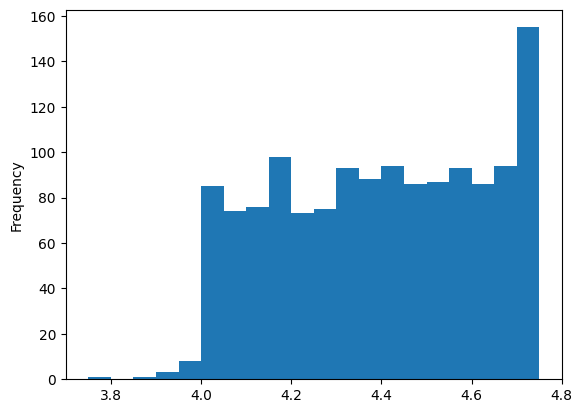

In [15]:
df['Rating'].plot(kind='hist', bins=20)

In [16]:
len(df[df['Rating'] < 4.0])

13

In [17]:
df.Rating.describe()

count    1370.000000
mean        4.374416
std         0.230176
min         3.750000
25%         4.150000
50%         4.400000
75%         4.550000
max         4.750000
Name: Rating, dtype: float64

## Spec_score
#### changes 
- nothing to change 
#### observation 
- only three values are less than 50 spec_score

In [18]:
df.head(1)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330


<Axes: ylabel='Frequency'>

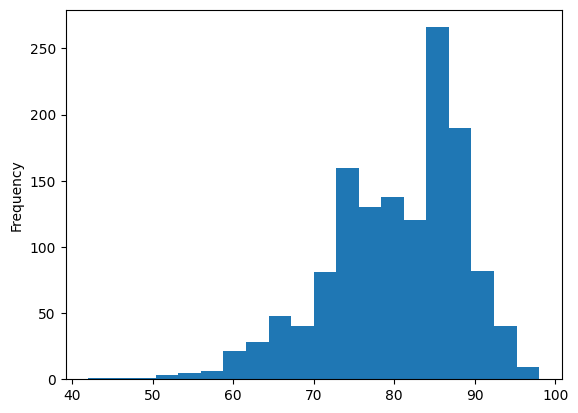

In [19]:
df['Spec_score'].plot(kind='hist', bins=20)

In [20]:
df1[df1['Spec_score'] == df1['Spec_score'].min()]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model
91,Vivo Y25,4.0,42,"Dual Sim, 3G, 4G,",1 GB RAM,1900 mAh Battery,4.5 inches,5 MP Rear &amp; 2 MP Front Camera,"Memory Card Supported, upto 128 GB",5.1 (Lollipop),"7,499",Vivo,16 GB inbuilt,NaN,480 x 854 px Display,Quad Core,Helio MT6580,Y25


In [21]:
df1['Spec_score'].describe()

count    1370.000000
mean       80.234307
std         8.373922
min        42.000000
25%        75.000000
50%        82.000000
75%        86.000000
max        98.000000
Name: Spec_score, dtype: float64

In [22]:
df1[df1['Spec_score'] < 50]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model
91,Vivo Y25,4.0,42,"Dual Sim, 3G, 4G,",1 GB RAM,1900 mAh Battery,4.5 inches,5 MP Rear &amp; 2 MP Front Camera,"Memory Card Supported, upto 128 GB",5.1 (Lollipop),"7,499",Vivo,16 GB inbuilt,NaN,480 x 854 px Display,Quad Core,Helio MT6580,Y25
719,Samsung Galaxy J2 Prime,4.0,49,"Dual Sim, 3G, 4G, VoLTE,",1.5 GB RAM,2600 mAh Battery,5 inches,8 MP Rear &amp; 5 MP Front Camera,Memory Card Supported,6.0 (Marshmallow),"8,999",Samsung,8 GB inbuilt,NaN,540 x 960 px Display,Quad Core,Helio MT6737T,Galaxy J2 Prime
1142,Xiaomi Qin 2 Pro,4.0,46,"Dual Sim, 3G, VoLTE,",2 GB RAM,2100 mAh Battery,5 inches,13 MP Rear Camera,No FM Radio,NaN,"9,990",Xiaomi,64 GB inbuilt,NaN,576 x 1440 px Display,Quad Core,Unisoc SC9832E,Qin 2 Pro


## No_of_sim
#### changes
- created a new feature for sim_slots
- found one value which has no sim_slots cos its not a phone it it a tablet , so removed that row
- create new network feature for each network type (network_3g, network_4g, network_5g)
- we didn't change dtype cos eventually we will drop the column
#### observations
- in sim_slot most of the values are dual , so it is a imbalance data case , so we might in future drop the column
- accept network_5g, all phones has 3g and 4g networks available
- most of the phones has ram between 4 to 16 

In [23]:
df1['sim_slot']= df1['No_of_sim'].str.split(' ').str.get(0)

In [24]:
df1.head(3)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,Galaxy F14,Dual
1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core,Galaxy A11,Dual
2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core,Galaxy A13,Dual


In [25]:
df1[df1['sim_slot'] == 'No']

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot
538,Poco Pad Tablet,4.4,67,"No Sim Supported,",6 GB RAM,10500 mAh Battery,12.1 inches,8 MP Rear &amp; 8 MP Front Camera,Memory Card Supported,14,"29,990",Poco,128 GB inbuilt,33W Fast Charging,1600 x 2560 px,Octa Core,Snapdragon 7s Gen2,Pad Tablet,No


In [26]:
df1 = df1.drop(index=538, axis=0)

In [27]:
df1[df1['sim_slot'] == 'No']

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot


In [28]:
def extract_network_features(row):
    network_3g = 1 if '3G' in row['No_of_sim'] else 0
    network_4g = 1 if '4G' in row['No_of_sim'] else 0
    network_5g = 1 if '5G' in row['No_of_sim'] else 0
    return pd.Series([network_3g, network_4g, network_5g], index=['network_3g', 'network_4g', 'network_5g'])

# Apply the function to create new columns
df1[['network_3g', 'network_4g', 'network_5g']] = df1.apply(extract_network_features, axis=1)


In [29]:
df1.sample(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,...,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g
404,iQOO U5x 5G,4.25,74,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.51 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Android v12,NaN,...,128 GB inbuilt,18W Fast Charging,1080 x 2400 px Display with Water Drop Notch,Octa Core,Snapdragon 480+,U5x,Dual,1,1,1


<Axes: xlabel='sim_slot'>

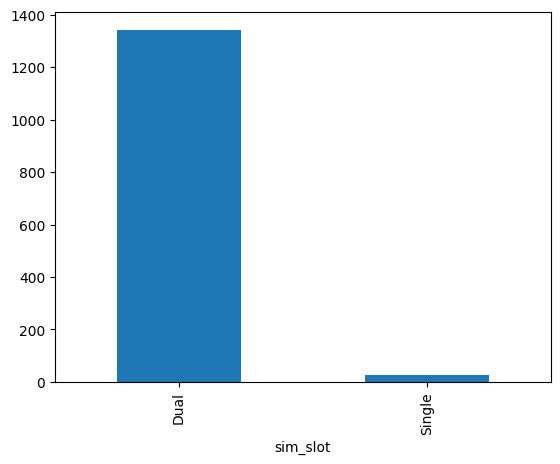

In [30]:
df1.sim_slot.value_counts().plot(kind='bar')

In [31]:
df1.network_3g.value_counts()

network_3g
1    1369
Name: count, dtype: int64

In [32]:
df1.network_4g.value_counts()

network_4g
1    1368
0       1
Name: count, dtype: int64

In [33]:
df1.network_5g.value_counts()

network_5g
1    930
0    439
Name: count, dtype: int64

## RAM
#### changes 
- created new featur for cleaned RAM
- change some values manually
- changed dtype to int
- replace the values from ram to inbuilt_memory which are actually from the inbuilt_memory feature
- and replace values with 8

#### observation
- found values from different columns 
- 

In [34]:
df1['cleaned_RAM'] = df1['Ram'].str.split(' ').str.get(0)

In [35]:
df1['cleaned_RAM'].unique()

array(['4', '2', '6', '8', '12', '1', '3', '16', 'Helio', '24', '18',
       '1.5', '128', '6000', '256', '512'], dtype=object)

In [36]:
df1[df1['cleaned_RAM'] == 'Helio']

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,...,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM
264,Realme 6i (6GB RAM + 64GB),3.85,76,"Dual Sim, 3G, 4G, VoLTE,",Helio G90T,"6 GB RAM, 64 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP Quad Rear &amp; 16 MP Front Camera,NaN,...,NaN,NaN,NaN,No Wifi,6i,Dual,1,1,0,Helio


In [37]:
# changing values manually
df1.at[264,'cleaned_RAM'] = 6

In [38]:
df1['cleaned_RAM'].unique()

array(['4', '2', '6', '8', '12', '1', '3', '16', 6, '24', '18', '1.5',
       '128', '6000', '256', '512'], dtype=object)

In [39]:
# changing values manually
df1[df1['cleaned_RAM'] == '1.5']

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,...,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM
719,Samsung Galaxy J2 Prime,4.0,49,"Dual Sim, 3G, 4G, VoLTE,",1.5 GB RAM,2600 mAh Battery,5 inches,8 MP Rear &amp; 5 MP Front Camera,Memory Card Supported,6.0 (Marshmallow),...,NaN,540 x 960 px Display,Quad Core,Helio MT6737T,Galaxy J2 Prime,Dual,1,1,0,1.5


In [40]:
df1.at[719,'cleaned_RAM'] = 2

In [41]:
df1['cleaned_RAM'].unique()


array(['4', '2', '6', '8', '12', '1', '3', '16', 6, '24', '18', 2, '128',
       '6000', '256', '512'], dtype=object)

In [42]:
df1['cleaned_RAM'] = df1['cleaned_RAM'].astype(int)

In [43]:
df1.sample(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,...,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM
351,OPPO F25,4.7,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,64 MP + 32 MP + 8 MP Triple Rear &amp; 32 MP F...,Memory Card (Hybrid),14,...,67W Fast Charging,1080 x 2412 px,Octa Core,Dimensity 7050,F25,Dual,1,1,1,8


In [44]:
df1['cleaned_RAM'].value_counts()

cleaned_RAM
8       528
4       253
12      246
6       214
16       41
3        38
2        23
256       8
128       7
18        4
512       3
24        2
1         1
6000      1
Name: count, dtype: int64

In [45]:
len(df1[df1['cleaned_RAM'] > 24] )

19

In [46]:
pd.set_option('display.max_columns',None)

In [47]:
df1[df1['cleaned_RAM'] > 24].head(3)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM
1232,Huawei Enjoy 70,4.65,65,"Dual Sim, 3G, 4G, VoLTE,",128 GB inbuilt,6000 mAh Battery,6.75 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 256 GB",4.0,"14,990",Huawei,NaN,22.5W Fast Charging,720 x 1600 px,Octa Core,Kirin 710A,Enjoy 70,Dual,1,1,0,128
1233,Huawei Enjoy 60,4.35,63,"Dual Sim, 3G, 4G, VoLTE,",128 GB inbuilt,6000 mAh Battery,6.75 inches,48 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,Memory Card Supported,3.0 (Honeycomb),"14,990",Huawei,NaN,22.5W Fast Charging,720 x 1600 px Display with Water Drop Notch,Quad Core,Kirin 710A,Enjoy 60,Dual,1,1,0,128
1239,Huawei Enjoy 70z,4.05,56,"Dual Sim, 3G, 4G, VoLTE,",128 GB inbuilt,6000 mAh Battery,6.75 inches,13 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,HarmonyOS v4,NaN,"15,990",Huawei,NaN,22.5W Fast Charging,720 x 1600 px Display with Water Drop Notch,NaN,Octa Core Processor,Enjoy 70z,Dual,1,1,0,128


In [48]:
# Step 1: Identify rows where cleaned_RAM > 24
mask = df1['cleaned_RAM'] > 24

# Step 2: Assign those values to Inbuilt_memory
df1.loc[mask, 'Inbuilt_memory'] = df1.loc[mask, 'cleaned_RAM']

# Step 3: Replace those values in cleaned_RAM with 8
df1.loc[mask, 'cleaned_RAM'] = 8

In [49]:
df1[df1['cleaned_RAM'] > 24]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM


In [50]:
df1['Inbuilt_memory'].isnull().sum()

np.int64(0)

In [51]:
df1['cleaned_RAM'].isnull().sum()

np.int64(0)

<Axes: xlabel='cleaned_RAM'>

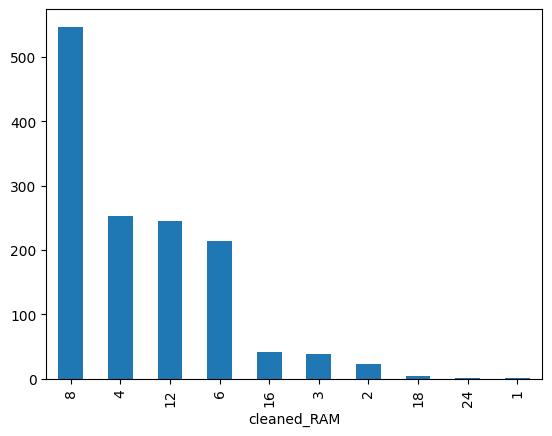

In [52]:
df1['cleaned_RAM'].value_counts().plot(kind='bar')

## Battery
#### changes
- put the right values in 266,264,1246,1248
- created new feature Battery_mAh
#### observations
- in 266,264,1246,1248 diff values found
- most of the phones has battery mAh between 4000 to 6000
- few phones have battery mAh >= 7000

In [53]:
df1['Battery_mAh'] = df1['Battery'].str.split(' ').str.get(0)

In [54]:
df1.at[266,'Battery_mAh'] = 4300
df1.at[1248,'Battery_mAh'] = 6000

In [55]:
df1.sample(2)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh
455,iQOO 9 Pro 5G (12GB RAM + 256GB),4.45,88,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4700 mAh Battery,6.78 inches,50 MP + 50 MP + 16 MP Triple Rear &amp; 16 MP ...,Android v12,NaN,"76,429",iQOO,256 GB inbuilt,120W Fast Charging,1440 x 3200 px,Octa Core,Snapdragon 8 Gen1,9 Pro,Dual,1,1,1,12,4700
22,Samsung Galaxy F32,4.50,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.67 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"19,990",Samsung,128 GB inbuilt,25W Fast Charging,1080 x 2408 px,NaN,Octa Core Processor,Galaxy F32,Dual,1,1,1,8,5000


In [56]:
df1['Battery_mAh'].unique()

array(['6000', '4000', '5000', '3500', '4500', '3400', '3300', '4050',
       '3900', '4300', '4800', '4200', '3700', '4400', '4320', '4030',
       '1900', '2650', '3000', '4600', '4100', '5500', '4830', '4700',
       '4810', '5100', '5400', '4870', '5700', '4730', '6', 4300, '5200',
       '5240', '5050', '4310', '4350', '4880', '4520', '4260', '4820',
       '4805', '5160', '5080', '5065', '5800', '5300', '5450', '5600',
       '2800', '4620', '4385', '4410', '4355', '4492', '4575', '5003',
       '4821', '7000', '3760', '2600', '4900', '4020', '4450', '4610',
       '3800', '3440', '2510', '6100', '2100', '5020', '4980', '4250',
       '6.75', 6000, '4460', '4815', '4750', '5330', '5010'], dtype=object)

In [57]:
df1.at[264,'Battery_mAh'] = 4300
df1.at[1246,'Battery_mAh'] = 6000

In [58]:
df1['Battery_mAh'].unique()

array(['6000', '4000', '5000', '3500', '4500', '3400', '3300', '4050',
       '3900', '4300', '4800', '4200', '3700', '4400', '4320', '4030',
       '1900', '2650', '3000', '4600', '4100', '5500', '4830', '4700',
       '4810', '5100', '5400', '4870', '5700', '4730', 4300, '5200',
       '5240', '5050', '4310', '4350', '4880', '4520', '4260', '4820',
       '4805', '5160', '5080', '5065', '5800', '5300', '5450', '5600',
       '2800', '4620', '4385', '4410', '4355', '4492', '4575', '5003',
       '4821', '7000', '3760', '2600', '4900', '4020', '4450', '4610',
       '3800', '3440', '2510', '6100', '2100', '5020', '4980', '4250',
       6000, '4460', '4815', '4750', '5330', '5010'], dtype=object)

In [59]:
df1['Battery_mAh'] = df1['Battery_mAh'].astype(int)

<Axes: ylabel='Frequency'>

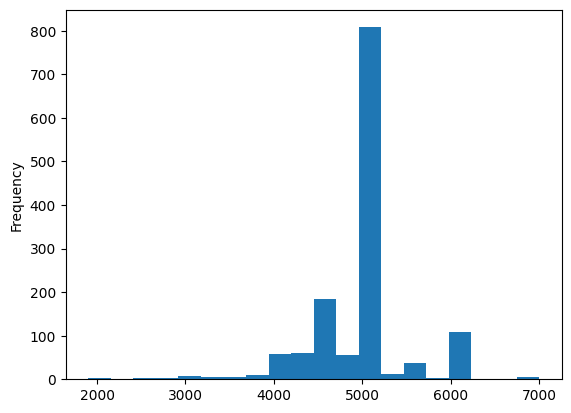

In [60]:
df1['Battery_mAh'].plot(kind='hist', bins=20)

In [61]:
df1[df1['Battery_mAh'] == df1['Battery_mAh'].min()]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh
91,Vivo Y25,4.0,42,"Dual Sim, 3G, 4G,",1 GB RAM,1900 mAh Battery,4.5 inches,5 MP Rear &amp; 2 MP Front Camera,"Memory Card Supported, upto 128 GB",5.1 (Lollipop),"7,499",Vivo,16 GB inbuilt,NaN,480 x 854 px Display,Quad Core,Helio MT6580,Y25,Dual,1,1,0,1,1900


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 0 to 1369
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1369 non-null   object 
 1   Rating             1369 non-null   float64
 2   Spec_score         1369 non-null   int64  
 3   No_of_sim          1369 non-null   object 
 4   Ram                1369 non-null   object 
 5   Battery            1369 non-null   object 
 6   Display            1369 non-null   object 
 7   Camera             1369 non-null   object 
 8   External_Memory    1369 non-null   object 
 9   Android_version    926 non-null    object 
 10  Price              1369 non-null   object 
 11  company            1369 non-null   object 
 12  Inbuilt_memory     1369 non-null   object 
 13  fast_charging      1280 non-null   object 
 14  Screen_resolution  1367 non-null   object 
 15  Processor          1341 non-null   object 
 16  Processor_name     1369 non-n

## Display
#### changes
- cahnged some incorrect values
- created new display_inches feature
#### observation
- all values are correct except some
- most of the phones have display in inches between 6 to 8
- only one phon has 10 inches display(TCL Trifold) 

In [63]:
df1['Display_inches'] = df1['Display'].str.split(' ').str.get(0)

In [64]:
df1.at[266,'Display_inches'] = 6.5
df1.at[1248,'Display_inches'] = 6.75

In [65]:
df1['Display_inches'].unique()

array(['6.6', '6.4', '6.5', '6.1', '6.7', '6.21', '6.67', '6.58', '6.71',
       '6.78', '6.8', '6.56', '6.3', '7.45', '6.2', '8.2', '7.6', '8',
       '7.63', '6.22', '4.5', '6.51', '6.53', '6.35', '6.55', '6.64',
       '5.2', '5.5', '6.72', '6.44', '6.82', '6.68', '7', '6.74', '8.03',
       '8.02', '7.8', '6.52', '6.59', '6.43', '4300', 6.5, '6.62', '6.57',
       '6.73', '6.83', '7.1', '7.4', '7.56', '7.82', '6.38', '6.79',
       '6.61', '6.69', '6.77', '6.75', '6.81', '7.2', '7.71', '7.92',
       '6.76', '7.9', '5.6', '5.7', '6.34', '6.14', '6.03', '8.3', '5.9',
       '5.92', '6', '6.26', '6.09', '5.99', '6.92', '5', '6.45', '6.9',
       '6.47', '6.28', '6.49', '6.08', '7.85', '7.11', '6.95', '48', 6.75,
       '6.94', '7.09', '10'], dtype=object)

In [66]:
df1['Display_inches'] = df1['Display_inches'].astype(float)

In [67]:
df1[df1['Display_inches'] == 4300]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches
264,Realme 6i (6GB RAM + 64GB),3.85,76,"Dual Sim, 3G, 4G, VoLTE,",Helio G90T,"6 GB RAM, 64 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP Quad Rear &amp; 16 MP Front Camera,NaN,"14,999",Realme,Octa Core,NaN,NaN,NaN,No Wifi,6i,Dual,1,1,0,6,4300,4300.0


In [68]:
df1.at[264,'Display_inches'] = 6.5
df1.at[1246,'Display_inches'] = 6.75

In [69]:
df1['Display_inches'].unique()

array([ 6.6 ,  6.4 ,  6.5 ,  6.1 ,  6.7 ,  6.21,  6.67,  6.58,  6.71,
        6.78,  6.8 ,  6.56,  6.3 ,  7.45,  6.2 ,  8.2 ,  7.6 ,  8.  ,
        7.63,  6.22,  4.5 ,  6.51,  6.53,  6.35,  6.55,  6.64,  5.2 ,
        5.5 ,  6.72,  6.44,  6.82,  6.68,  7.  ,  6.74,  8.03,  8.02,
        7.8 ,  6.52,  6.59,  6.43,  6.62,  6.57,  6.73,  6.83,  7.1 ,
        7.4 ,  7.56,  7.82,  6.38,  6.79,  6.61,  6.69,  6.77,  6.75,
        6.81,  7.2 ,  7.71,  7.92,  6.76,  7.9 ,  5.6 ,  5.7 ,  6.34,
        6.14,  6.03,  8.3 ,  5.9 ,  5.92,  6.  ,  6.26,  6.09,  5.99,
        6.92,  5.  ,  6.45,  6.9 ,  6.47,  6.28,  6.49,  6.08,  7.85,
        7.11,  6.95,  6.94,  7.09, 10.  ])

<Axes: ylabel='Frequency'>

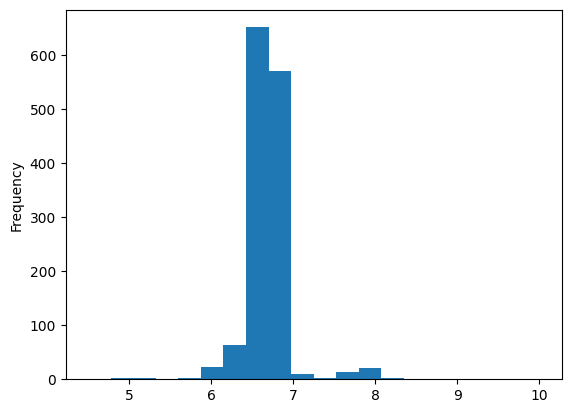

In [70]:
df1['Display_inches'].plot(kind='hist' , bins=20)

In [71]:
df1['Display_inches'].describe()

count    1369.000000
mean        6.660029
std         0.298311
min         4.500000
25%         6.550000
50%         6.670000
75%         6.740000
max        10.000000
Name: Display_inches, dtype: float64

In [72]:
df1[df1['Display_inches'] > 8]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches
76,Samsung Galaxy Z Fold 6 Ultra,4.05,96,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,5000 mAh Battery,8.2 inches,"Foldable Display, Dual Display",200 MP Quad Rear &amp; 12 MP + 12 MP Dual Fron...,14,"1,99,990",Samsung,256 GB inbuilt,80W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8 Gen3,Galaxy Z Fold 6 Ultra,Dual,1,1,1,12,5000,8.20
197,Vivo X Fold 3,4.00,94,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,5500 mAh Battery,8.03 inches,"Foldable Display, Dual Display",50 MP + 50 MP + 50 MP Triple Rear &amp; 32 MP ...,14,"80,990",Vivo,256 GB inbuilt,80W Fast Charging,2200 x 2480 px,Octa Core,Snapdragon 8 Gen2,X Fold 3,Dual,1,1,1,12,5500,8.03
198,Vivo X Fold 4,4.15,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,5000 mAh Battery,8.2 inches,"Foldable Display, Dual Display",200 MP + 12 MP + 12 MP Triple Rear &amp; 32 MP...,15,"1,39,990",Vivo,256 GB inbuilt,150W Fast Charging,1916 x 2160 px,Octa Core Processor,Snapdragon 8 Gen3,X Fold 4,Dual,1,1,1,12,5000,8.20
199,Vivo X Fold 5G (12GB RAM + 512GB),4.55,93,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4600 mAh Battery,8.03 inches,"Foldable Display, Dual Display",50 MP Quad Rear &amp; 16 MP Front Camera,12,"1,18,990",Vivo,512 GB inbuilt,66W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8 Gen1,X Fold,Dual,1,1,1,12,4600,8.03
200,Vivo X Fold 3 Pro,4.45,98,"Dual Sim, 3G, 4G, 5G, VoLTE,",16 GB RAM,5700 mAh Battery,8.03 inches,"Foldable Display, Dual Display",64 MP + 50 MP + 50 MP Triple Rear &amp; 32 MP ...,14,"1,15,990",Vivo,512 GB inbuilt,100W Fast Charging,2200 x 2480 px,Octa Core,Snapdragon 8 Gen3,X Fold 3 Pro,Dual,1,1,1,16,5700,8.03
201,Vivo X Fold Plus,4.20,93,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4730 mAh Battery,8.03 inches,"Foldable Display, Dual Display",50 MP Quad Rear &amp; 16 MP + 16 MP Dual Front...,12,"1,13,990",Vivo,256 GB inbuilt,80W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8+ Gen1,X Fold Plus,Dual,1,1,1,12,4730,8.03
202,Vivo X Fold S,4.30,90,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,4700 mAh Battery,8.02 inches,"Foldable Display, Dual Display",48 MP + 48 MP + 10 MP Triple Rear &amp; 16 MP ...,12,"1,10,990",Vivo,128 GB inbuilt,80W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8+ Gen1,X Fold S,Dual,1,1,1,8,4700,8.02
204,Vivo X Fold 2,4.25,91,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4800 mAh Battery,8.03 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 12 MP Triple Rear &amp; 16 MP ...,13,"1,07,990",Vivo,256 GB inbuilt,120W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8 Gen2,X Fold 2,Dual,1,1,1,12,4800,8.03
205,Vivo X Fold 5G,4.40,92,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4600 mAh Battery,8.03 inches,"Foldable Display, Dual Display",50 MP Quad Rear &amp; 16 MP Front Camera,12,"1,06,990",Vivo,256 GB inbuilt,66W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8 Gen1,X Fold,Dual,1,1,1,12,4600,8.03
648,Google Pixel Notepad,4.45,83,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,5003 mAh Battery,8.3 inches,50 MP + 48 MP + 12 MP Triple Rear &amp; 12 MP ...,Android v12,NaN,"1,25,990",Google,128 GB inbuilt,30W Fast Charging,1940 x 3120 px,Octa Core Processor,Google Tensor 2,Pixel Notepad,Dual,1,1,1,12,5003,8.30


## Camera
#### changes
- we ramoved wrong values to the correct values which are located in different columns
- create 2 new features for front and rear cameras and add values accordingly
- in some cases we have to values manually 
#### observations
- most of the phone has 50mp in rear and 16mp in front
#### aproch
- removed wrong values , add correct values from different columns,create new columns for preventing messy data


In [73]:
df1.loc[df1['Camera'].str.contains('Foldable Display, Dual Display', na=False), 'Camera'] = df1['External_Memory']
df1.loc[df1['Camera'].str.contains('Dual Display', na=False), 'Camera'] = df1['External_Memory']
df1.loc[df1['Camera'].str.contains('Foldable Display', na=False), 'Camera'] = df1['External_Memory']


In [74]:
df1.iloc[264:266:]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches
264,Realme 6i (6GB RAM + 64GB),3.85,76,"Dual Sim, 3G, 4G, VoLTE,",Helio G90T,"6 GB RAM, 64 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP Quad Rear &amp; 16 MP Front Camera,NaN,"14,999",Realme,Octa Core,NaN,NaN,NaN,No Wifi,6i,Dual,1,1,0,6,4300,6.50
265,Realme Narzo 80x 5G,4.35,71,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.72 inches,50 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP Fr...,"Memory Card (Hybrid), upto 2 TB",15,"14,990",Realme,128 GB inbuilt,65W Fast Charging,1080 x 2400 px,Octa Core Processor,Dimensity 7025,Narzo 80x,Dual,1,1,1,6,5000,6.72


In [75]:
df1['rear_camera'] = df1['Camera'].str.split(';').str.get(0)
df1['front_camera'] = df1['Camera'].str.split(';').str.get(1)

df1['rear_camera'] = df1['rear_camera'].str.split(' ').str.get(0)
df1['front_camera'] = df1['front_camera'].str.split(' ').str.get(1)


In [76]:
df1.sample()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera
995,Motorola Moto G Stylus 5G,4.55,81,"Single Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.8 inches,48 MP Quad Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",11,"28,990",Motorola,256 GB inbuilt,NaN,1080 x 2400 px Display with Punch Hole,Octa Core,Snapdragon 480,Moto G Stylus,Single,1,1,1,6,5000,6.8,48,16


In [77]:
df1[df1['front_camera'].isnull()]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera
251,Realme C67 4G,4.40,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.72 inches,108 MP + 2 MP Dual Rear Camera,"Memory Card Supported, upto 1 TB",14,"11,990",Realme,128 GB inbuilt,33W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 685,C67,Dual,1,1,0,8,5000,6.72,108,NaN
264,Realme 6i (6GB RAM + 64GB),3.85,76,"Dual Sim, 3G, 4G, VoLTE,",Helio G90T,"6 GB RAM, 64 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP Quad Rear &amp; 16 MP Front Camera,NaN,"14,999",Realme,Octa Core,NaN,NaN,NaN,No Wifi,6i,Dual,1,1,0,6,4300,6.50,6.5,NaN
1142,Xiaomi Qin 2 Pro,4.00,46,"Dual Sim, 3G, VoLTE,",2 GB RAM,2100 mAh Battery,5 inches,13 MP Rear Camera,No FM Radio,NaN,"9,990",Xiaomi,64 GB inbuilt,NaN,576 x 1440 px Display,Quad Core,Unisoc SC9832E,Qin 2 Pro,Dual,1,0,0,2,2100,5.00,13,NaN
1246,Huawei Nova Y70 Plus,4.55,66,"Dual Sim, 3G, 4G, VoLTE,",6000 mAh Battery with 22.5W Fast Charging,"6.75 inches, 720 x 1600 px Display",48 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),Android,NaN,"24,999",Huawei,6000,Water Drop Notch,NaN,128 GB inbuilt,4 GB RAM,Nova Y70 Plus,Dual,1,1,0,8,6000,6.75,Memory,NaN


In [78]:
df1.at[251, 'front_camera'] = 8
df1.at[264, 'front_camera'] = 16
df1.at[1142, 'front_camera'] = 0
df1.at[1246, 'front_camera'] = 8

df1.at[264, 'rear_camera'] = 48
df1.at[1142, 'rear_camera'] = 0
df1.at[1246, 'rear_camera'] = 48

In [79]:
df1[df1['front_camera'].isnull()]


,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera


<Axes: xlabel='front_camera'>

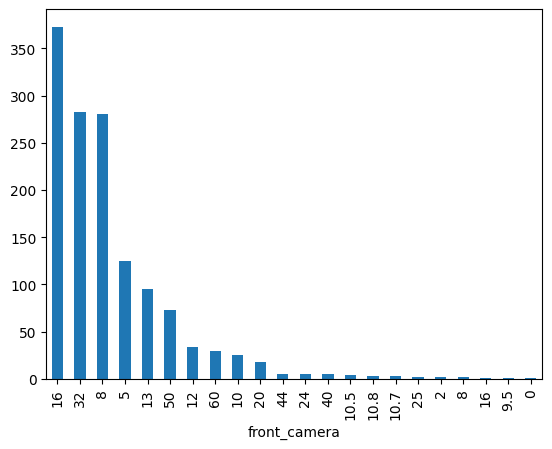

In [80]:
df1['front_camera'].value_counts().plot(kind='bar')


<Axes: xlabel='rear_camera'>

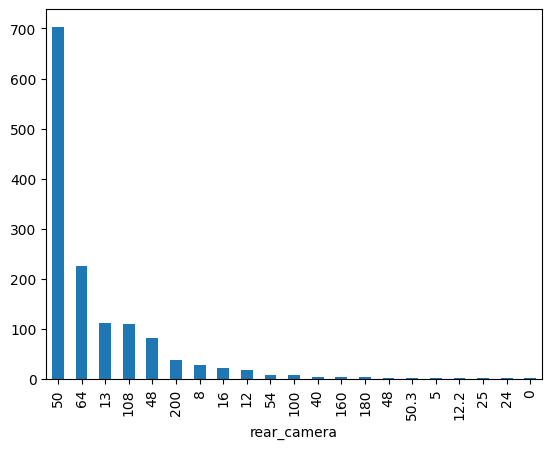

In [81]:
df1['rear_camera'].value_counts().plot(kind='bar')

## External_Memory
#### changes
- removed unnecessary string and wrong values
- filled 0 and null values with 128
#### observations
- only one phone has 32gb external memory other are between 2tb to 126gb

In [82]:
def clean_external_memory(column):
    if 'Memory Card' in column:
        return column
    else:
        return None

In [83]:
df1['cleaned_External_Memory'] = df1['External_Memory'].apply(clean_external_memory)

In [84]:
df1.head(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,Galaxy F14,Dual,1,1,1,4,6000,6.6,50,13,"Memory Card Supported, upto 1 TB"


In [85]:
df1['cleaned_External_Memory'] = df1['cleaned_External_Memory'].str.split(' ').str.get(4) 

In [86]:
df1['cleaned_External_Memory'].isnull().sum()

np.int64(759)

In [87]:
def clean_and_transform_external_memory(x):
    if pd.isna(x):  # Checks for both None and NaN
        return 0
    elif x == '1' or x == '2':
        return int(x) * 1000
    elif isinstance(x, str) and x.isdigit():
        return int(x)
    else:
        return None

In [88]:
# Apply the function to the DataFrame
df1['cleaned_External_Memory'] = df1['cleaned_External_Memory'].apply(clean_and_transform_external_memory)

In [89]:
df1.head(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,Galaxy F14,Dual,1,1,1,4,6000,6.6,50,13,1000


In [90]:
df1['cleaned_External_Memory'].isnull().sum()

np.int64(0)

In [91]:
df1['cleaned_External_Memory'].unique()

array([1000,  512,    0,  256,  128, 2000,   32])

In [92]:
df1['cleaned_External_Memory'].value_counts()

cleaned_External_Memory
0       759
1000    394
512      87
256      75
2000     47
128       6
32        1
Name: count, dtype: int64

In [93]:
df1['cleaned_External_Memory'] = df1['cleaned_External_Memory'].apply(lambda x: x + 128 if x == 0 else x)

<Axes: xlabel='cleaned_External_Memory'>

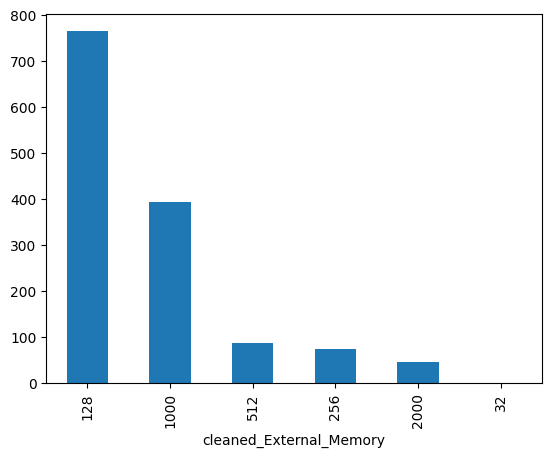

In [94]:
df1['cleaned_External_Memory'].value_counts().plot(kind='bar')

In [95]:
df1[df1['cleaned_External_Memory'] == 32]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory
651,itel S16 Pro,4.55,57,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.6 inches,8 MP + 2 MP + 0.3 MP Triple Rear &amp; 8 MP Fr...,"Memory Card Supported, upto 32 GB",10,"6,990",itel,32 GB inbuilt,NaN,1600 x 720 px Display with Punch Hole,1.3 GHz Processor,Quad Core,S16 Pro,Dual,1,1,0,2,4000,6.6,8,8,32


## Android_version
#### changes
- add all missing values from other columns 
- fill null values with mode 
- convert dtype to float
#### observations
- most of the values from Android_version are located in External_Memory
- most of the phone has versions 13

In [96]:
df1['Android_version'].isnull().sum()

np.int64(443)

In [97]:
df1[['Android_version','External_Memory']]

,Android_version,External_Memory
0,13,"Memory Card Supported, upto 1 TB"
1,10,"Memory Card Supported, upto 512 GB"
2,12,"Memory Card Supported, upto 1 TB"
3,12,"Memory Card Supported, upto 1 TB"
4,11,"Memory Card Supported, upto 1 TB"
...,...,...
1365,12,Memory Card (Hybrid)
1366,14,Memory Card (Hybrid)
1367,13,"Memory Card Supported, upto 1 TB"
1368,13,"Memory Card Supported, upto 1 TB"


In [98]:
# Step 1: Identify rows 
mask = df1['External_Memory'].str.contains('Android', 'HarmonyOS')

# Step 2: Assign those values 
df1.loc[mask, 'Android_version'] = df1.loc[mask, 'External_Memory']


In [99]:
df1['Android_version'].isnull().sum()

np.int64(73)

In [100]:
df1['Android_version'].unique()


array(['13', '10', '12', '11', '15', '10.0', '9.0 (Pie)', '14', nan,
       'Android v13', 'Android v10', 'Android v12', '7.1.1 (Nougat)',
       '8.0 (Oreo)', '8.1 (Oreo)', '5.1 (Lollipop)', '6.0 (Marshmallow)',
       'Android v11', 'Android v15', 'Android v14', 'Android v9.0 (Pie)',
       '9 (Pie)', '3', '2', 'Android v10.0', 'Android v12.1', '4.0',
       '3.0 (Honeycomb)', '2.0', 'Android', '3.0', '3.1', '5.0', '4.1'],
      dtype=object)

In [101]:
# Fill missing values with the mode of the column
android_version_mode = df1['Android_version'].mode()[0]  # Get the first mode value
df1['Android_version'] = df1['Android_version'].fillna(android_version_mode)


In [102]:
df1['Android_version'].isnull().sum()


np.int64(0)

In [103]:
df1.sample()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory
296,Realme 13 Pro 5G,4.65,84,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.74 inches,50 MP + 50 MP + 32 MP Triple Rear &amp; 32 MP ...,Android v14,Android v14,"29,990",Realme,128 GB inbuilt,80W Fast Charging,1080 x 2412 px,Octa Core,Snapdragon 7 Gen1,13 Pro,Dual,1,1,1,8,5000,6.74,50,32,128


In [104]:
# Function to extract the numeric part from the string
def extract_numeric(version):
    if pd.isna(version):
        return version
    # Extract the first number in the string
    match = re.search(r'\d+', version)
    return int(match.group()) if match else np.nan

# Apply the function to the Android_version column
df1['Android_version'] = df1['Android_version'].apply(extract_numeric)

In [105]:
df1['Android_version'].unique()

array([13., 10., 12., 11., 15.,  9., 14.,  7.,  8.,  5.,  6.,  3.,  2.,
        4., nan])

<Axes: xlabel='Android_version'>

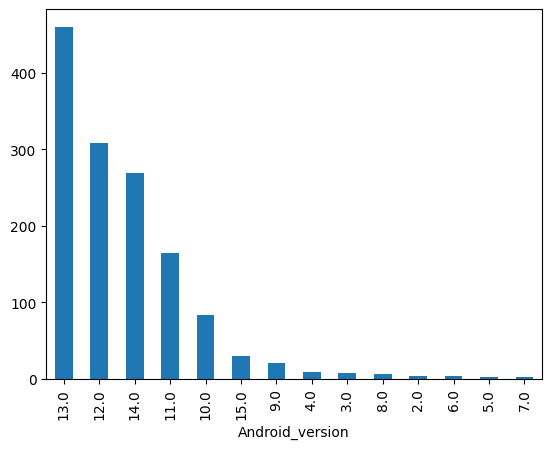

In [106]:
df1['Android_version'].value_counts().plot(kind='bar')

## price
#### changes
- removed coma 
- change dtype
#### observations
- most of the values are between 10000 to 50000 
- few are between 100000 to 200000

In [107]:
df1['Price'].isnull().sum()

np.int64(0)

In [108]:
df1['Price'] = df1['Price'].str.replace(',', '')

In [109]:
df1['Price'][23]

'19799'

In [110]:
df1['Price'] = df1['Price'].astype(int)

<Axes: ylabel='Frequency'>

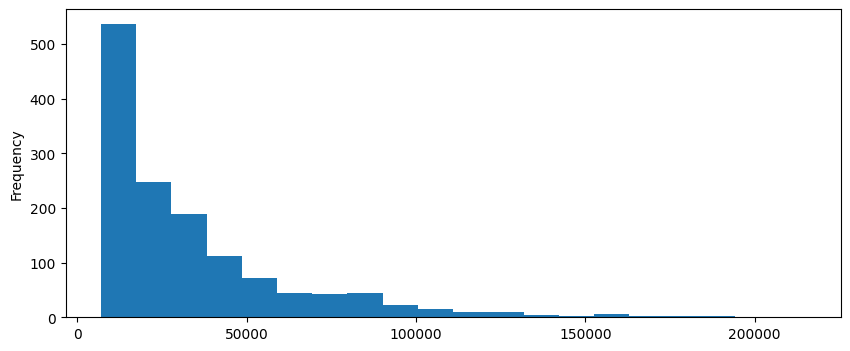

In [111]:
df1['Price'].plot(kind='hist', bins=20, figsize=(10, 4))

## company
#### changes 
- nathing to change
#### observations
- most of the phone company's are samsung, vivo, realme and motorola rest are others

In [112]:
df1['company'].isnull().sum()

np.int64(0)

<Axes: ylabel='company'>

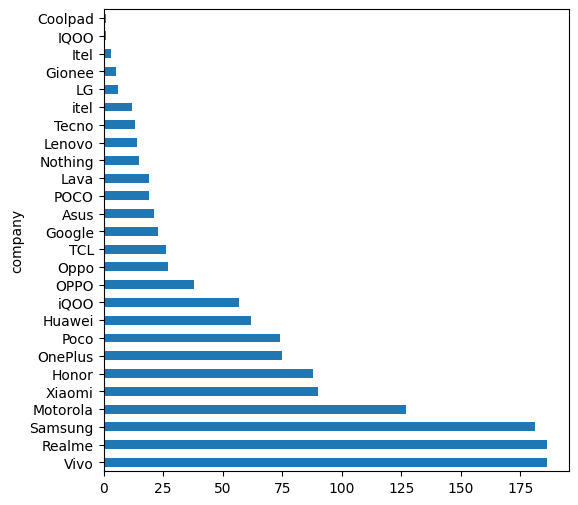

In [113]:
df1['company'].value_counts().plot(kind='barh', figsize=(6, 6))

## inbuilt_memory
#### changes
- removes extra strings
#### observations
- 264 . 1246 has different values
- most of the phone hase 64 to 128 gb inbuilt memory


In [114]:
df1['Inbuilt_memory'].unique()

array([' 128 GB inbuilt', ' 32 GB inbuilt', ' 64 GB inbuilt',
       ' 256 GB inbuilt', ' 1 TB inbuilt', ' 512 GB inbuilt',
       ' 16 GB inbuilt', ' Octa Core', ' 258 GB inbuilt', ' 8 GB inbuilt',
       128, 6000, 256, 512], dtype=object)

In [115]:
df1['Inbuilt_memory'].value_counts()

Inbuilt_memory
 128 GB inbuilt    643
 256 GB inbuilt    405
 64 GB inbuilt     184
 512 GB inbuilt     59
 32 GB inbuilt      48
256                  8
128                  7
 1 TB inbuilt        5
 16 GB inbuilt       3
512                  3
 8 GB inbuilt        1
 258 GB inbuilt      1
 Octa Core           1
6000                 1
Name: count, dtype: int64

In [116]:
df1['Inbuilt_memory'] = df1['Inbuilt_memory'].astype(str)

In [117]:
def remove_first_space(data):
    if data.startswith(' '):
        return data[1:]  # Return the string starting from the second character
    else:
        return data 
    
df1['cleaned_Inbuilt_memory'] = df1['Inbuilt_memory'].apply(remove_first_space)

In [118]:
df1['cleaned_Inbuilt_memory'].value_counts()

cleaned_Inbuilt_memory
128 GB inbuilt    643
256 GB inbuilt    405
64 GB inbuilt     184
512 GB inbuilt     59
32 GB inbuilt      48
256                 8
128                 7
1 TB inbuilt        5
16 GB inbuilt       3
512                 3
8 GB inbuilt        1
258 GB inbuilt      1
Octa Core           1
6000                1
Name: count, dtype: int64

In [119]:
df1['cleaned_Inbuilt_memory'] = df1['cleaned_Inbuilt_memory'].str.split(' ').str.get(0)

In [120]:
df1['cleaned_Inbuilt_memory'].unique()

array(['128', '32', '64', '256', '1', '512', '16', 'Octa', '258', '8',
       '6000'], dtype=object)

In [121]:
df1['cleaned_Inbuilt_memory'].value_counts()


cleaned_Inbuilt_memory
128     650
256     413
64      184
512      62
32       48
1         5
16        3
Octa      1
258       1
8         1
6000      1
Name: count, dtype: int64

In [122]:
df1[df1['cleaned_Inbuilt_memory'] == 'Octa']
df1[df1['cleaned_Inbuilt_memory'] == '6000']

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory,cleaned_Inbuilt_memory
1246,Huawei Nova Y70 Plus,4.55,66,"Dual Sim, 3G, 4G, VoLTE,",6000 mAh Battery with 22.5W Fast Charging,"6.75 inches, 720 x 1600 px Display",48 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),Android,NaN,24999,Huawei,6000,Water Drop Notch,NaN,128 GB inbuilt,4 GB RAM,Nova Y70 Plus,Dual,1,1,0,8,6000,6.75,48,8,128,6000


In [123]:
df1.at[264, 'cleaned_Inbuilt_memory'] = 64
df1.at[1246, 'cleaned_Inbuilt_memory'] = 128

In [124]:
df1['cleaned_Inbuilt_memory'].unique()

array(['128', '32', '64', '256', '1', '512', '16', 64, '258', '8', 128],
      dtype=object)

In [125]:
df1['cleaned_Inbuilt_memory'] = df1['cleaned_Inbuilt_memory'].astype(int)

In [126]:
df1['cleaned_Inbuilt_memory'] = df1['cleaned_Inbuilt_memory'].apply(lambda x:x + 999 if x == 1 else x)

<Axes: xlabel='cleaned_Inbuilt_memory'>

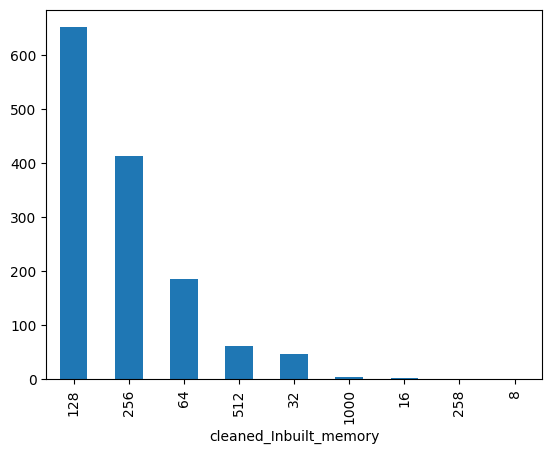

In [127]:
df1['cleaned_Inbuilt_memory'].value_counts().plot(kind='bar')

## fast_charging
#### changes
- convert dtype into int
- removed unnecessary string
- filled null values with mean
#### observation 
- most of the phone has 18 to 100 w charger

In [128]:
df1['fast_charging'].isnull().sum()

np.int64(89)

In [129]:
df1['fast_charging'].describe()

count                   1280
unique                    38
top        18W Fast Charging
freq                     157
Name: fast_charging, dtype: object

In [130]:
df1['fast_charging']

0        25W Fast Charging
1        15W Fast Charging
2        25W Fast Charging
3                      NaN
4        15W Fast Charging
               ...        
1365     15W Fast Charging
1366     33W Fast Charging
1367     18W Fast Charging
1368     15W Fast Charging
1369     67W Fast Charging
Name: fast_charging, Length: 1369, dtype: object

In [131]:
df1['fast_charging'] = df1['fast_charging'].astype(str)
def remove_first_space(data):
    if data.startswith(' '):
        return data[1:]  # Return the string starting from the second character
    else:
        return data 
    
df1['cleaned_fast_charging'] = df1['fast_charging'].apply(remove_first_space)

In [132]:
df1['cleaned_fast_charging'].value_counts()

cleaned_fast_charging
18W Fast Charging      157
33W Fast Charging      143
67W Fast Charging      101
25W Fast Charging       97
nan                     89
80W Fast Charging       78
100W Fast Charging      70
66W Fast Charging       66
120W Fast Charging      65
44W Fast Charging       61
15W Fast Charging       61
45W Fast Charging       58
65W Fast Charging       50
30W Fast Charging       44
Fast Charging           39
10W Fast Charging       39
150W Fast Charging      24
22.5W Fast Charging     20
68W Fast Charging       20
40W Fast Charging       17
35W Fast Charging       14
125W Fast Charging      12
20W Fast Charging       11
200W Fast Charging       7
240W Fast Charging       3
88W Fast Charging        3
55W Fast Charging        3
90W Fast Charging        3
27W Fast Charging        2
50W Fast Charging        2
250W Fast Charging       2
57W Fast Charging        1
60W Fast Charging        1
68.2W Fast Charging      1
08W Fast Charging        1
135W Fast Charging       1
70W Fa

In [133]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].str.split(' ').str.get(0)

In [134]:
df1['cleaned_fast_charging'].unique()

array(['25W', '15W', 'nan', '18W', '30W', 'Fast', '45W', '33W', '67W',
       '80W', '10W', '44W', '66W', '100W', '120W', '150W', '55W', '200W',
       '65W', '60W', '20W', '50W', '57W', '240W', '125W', '68W', '250W',
       '27W', '35W', '22.5W', '40W', '90W', '08W', '68.2W', '135W', '70W',
       'Water', '88W', '7.5W'], dtype=object)

In [135]:
def remove_extra_strings(df1):
    if df1.startswith('Water') or df1.startswith('Fast') or df1.startswith('nan'):
        return 0
    else:
        return df1

In [136]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].apply(remove_extra_strings)

In [137]:
df1['cleaned_fast_charging'].unique()

array(['25W', '15W', 0, '18W', '30W', '45W', '33W', '67W', '80W', '10W',
       '44W', '66W', '100W', '120W', '150W', '55W', '200W', '65W', '60W',
       '20W', '50W', '57W', '240W', '125W', '68W', '250W', '27W', '35W',
       '22.5W', '40W', '90W', '08W', '68.2W', '135W', '70W', '88W',
       '7.5W'], dtype=object)

In [138]:
df1['cleaned_fast_charging'] = list(map(lambda x: str(x).replace('W', '') if isinstance(x, str) else x, df1['cleaned_fast_charging']))

In [139]:
df1['cleaned_fast_charging'].unique()

array(['25', '15', 0, '18', '30', '45', '33', '67', '80', '10', '44',
       '66', '100', '120', '150', '55', '200', '65', '60', '20', '50',
       '57', '240', '125', '68', '250', '27', '35', '22.5', '40', '90',
       '08', '68.2', '135', '70', '88', '7.5'], dtype=object)

In [140]:
df1['cleaned_fast_charging'].isnull().sum()

np.int64(0)

In [141]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].astype(float)

In [142]:
mean = df1['cleaned_fast_charging'].mean()

In [143]:
mean

np.float64(47.83104455807158)

In [144]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].fillna(mean)

In [145]:
df1['cleaned_fast_charging']  = df1['cleaned_fast_charging'].apply(lambda x: x+47 if x == 0 else x)

In [146]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].round()

In [147]:
df1['cleaned_fast_charging'] = df1['cleaned_fast_charging'].astype(int)


In [148]:
df1['cleaned_fast_charging'].unique()

array([ 25,  15,  47,  18,  30,  45,  33,  67,  80,  10,  44,  66, 100,
       120, 150,  55, 200,  65,  60,  20,  50,  57, 240, 125,  68, 250,
        27,  35,  22,  40,  90,   8, 135,  70,  88])

<Axes: ylabel='cleaned_fast_charging'>

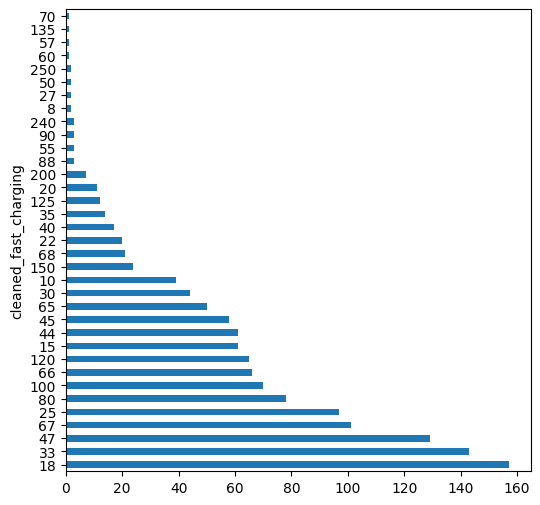

In [149]:
df1['cleaned_fast_charging'].value_counts().plot(kind='barh', figsize=(6,6))

## screen_resolution 
#### changes 
- removed extra string
- created new feature total px
#### observation
- most of the phone has high px

In [150]:
df1['Screen_resolution'].isnull().sum()

np.int64(2)

In [151]:
df1['Screen_resolution']

0        2408 x 1080 px Display with Water Drop Notch
1               720 x 1560 px Display with Punch Hole
2        1080 x 2408 px Display with Water Drop Notch
3                                       720 x 1600 px
4         720 x 1600 px Display with Water Drop Notch
                            ...                      
1365                                    720 x 1612 px
1366                                   1200 x 2400 px
1367                                    720 x 1612 px
1368                                    720 x 1612 px
1369                                   1916 x 2160 px
Name: Screen_resolution, Length: 1369, dtype: object

In [152]:
# Function to extract total pixels
def extract_total_px(resolution):
    if pd.isna(resolution):
        return 0  # Return 0 for NaN values
    resolution = resolution.strip()  # Remove leading and trailing spaces
    parts = resolution.split(' ')
    if len(parts) >= 3:
        try:
            return int(parts[0]) * int(parts[2])  # Multiply first and third elements
        except ValueError:
            return 0  # Handle cases where conversion fails
    else:
        return 0  # Return 0 if format is unexpected

# Apply the function to create the total_px column
df1['total_px'] = df1['Screen_resolution'].apply(extract_total_px)

In [153]:
mean = df1['total_px'].mean()
mean

np.float64(2562400.619430241)

In [154]:
df1['total_px'] = df1['total_px'].apply(lambda x: x+2563520 if x == 0 else x)

<Axes: ylabel='Frequency'>

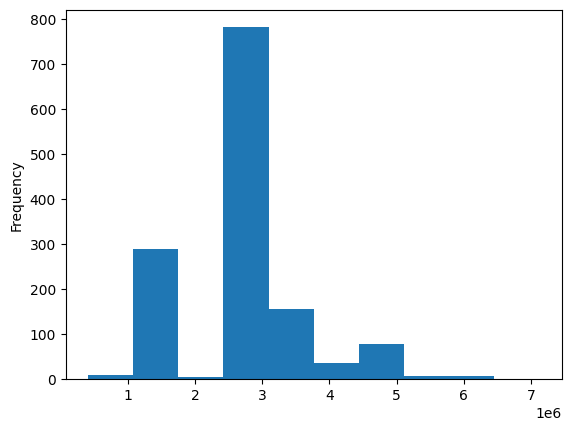

In [155]:
df1['total_px'].plot(kind='hist')

## processor 
#### cahnges
- since almost all phone has same processor , the colunm is not defining anything
so we dropping the colunm

In [156]:
df1['Processor']

0        Octa Core Processor
1          1.8 GHz Processor
2            2 GHz Processor
3                  Octa Core
4                  Octa Core
                ...         
1365               Octa Core
1366               Octa Core
1367               Octa Core
1368               Octa Core
1369               Octa Core
Name: Processor, Length: 1369, dtype: object

In [157]:
df1 = df1.drop('Processor', axis=1)

## processor_name
#### cahnges
- categories processor_name into category based on top 5 processors
#### observation
- top 5 processors are 'Exynos', 'Octa', 'Helio', 'Dimensity', 'Snapdragon'

In [158]:
df1['Processor_name']

0             Exynos 1330
1               Octa Core
2               Octa Core
3               Helio G88
4               Helio P35
              ...        
1365     Dimensity 700 5G
1366       Dimensity 7050
1367       Dimensity 6080
1368       Dimensity 6020
1369    Snapdragon 8 Gen2
Name: Processor_name, Length: 1369, dtype: object

In [159]:
df1['Processor_name'].isnull().sum()

np.int64(0)

In [160]:
df1['Processor_name'].nunique()

276

<Axes: xlabel='Processor_name'>

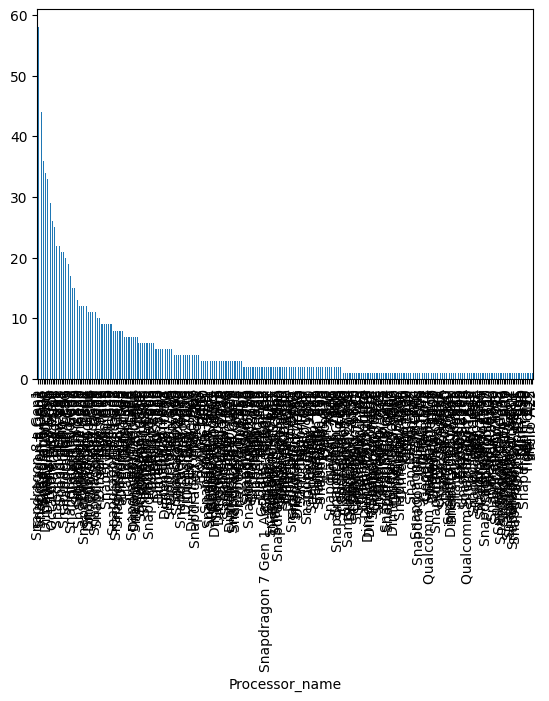

In [161]:
df1['Processor_name'].value_counts().plot(kind='bar')

In [162]:
df1['Processor_name'].unique()

array(['Exynos 1330', 'Octa Core', 'Helio G88', 'Helio P35',
       'Dimensity 700', 'Exynos 9611', 'Exynos  850', 'Exynos 1280',
       'Snapdragon 695', 'Exynos 850', 'Helio P65', 'Octa Core Processor',
       'Snapdragon 680', 'Helio G80', 'Samsung Exynos 7884',
       'Dimensity 6100 Plus', 'Dimensity 700 5G', 'Snapdragon  680',
       'Snapdragon 888', 'Exynos 1380', 'Snapdragon 865', 'Exynos 980',
       'Snapdragon 730', 'Snapdragon 675', 'Snapdragon 7 Gen1',
       'Snapdragon 750G', 'Snapdragon 855+', 'Snapdragon 870',
       'Snapdragon 710', 'Exynos 1480', 'Snapdragon  720G ',
       'Snapdragon 778g', 'Exynos 2200', 'Snapdragon 7+ Gen2',
       'Snapdragon 8 Gen 2', 'Exynos 9825', 'Snapdragon 7s Gen2',
       'Exynos 2100', 'Dimensity 1300', 'Snapdragon 778G+',
       'Snapdragon 778G', 'Exynos 2300', 'Snapdragon 8+ Gen1',
       'Snapdragon 8 Gen3', 'Snapdragon  8+ Gen1', 'Snapdragon  8 Gen1',
       'Exynos 990', 'Snapdragon 855', 'Exynos 8895', 'Exynos  2100',
       'Ex

In [163]:
df1['Processor_name'] = df1['Processor_name'].str.split(' ').str.get(0)

In [164]:
df1['Processor_name'].value_counts()

Processor_name
Snapdragon    647
Dimensity     315
Helio         203
Exynos         65
Octa           33
Unisoc         30
Kirin          24
Tiger          20
Google         10
Tensor          9
                4
Sanpdragon      2
Qualcomm        2
Samsung         1
No              1
SC9863A         1
Quad            1
4               1
Name: count, dtype: int64

In [165]:
def processor_cat(processor):
    if processor.startswith('Snapdragon'):
        return 'Snapdragon'
    elif processor.startswith('Exynos'):
        return 'Exynos'
    elif processor.startswith('Helio'):
        return 'Helio'
    elif processor.startswith('Dimensity'):
        return 'Dimensity'
    elif processor.startswith('Octa'):
        return 'Octa'
    elif processor.startswith('Unisoc'):
        return 'Unisoc'
    else:
        return 'Other'

In [166]:
df1['Processor_name'] = df1['Processor_name'].apply(processor_cat)

In [167]:
df1['Processor_name'].unique()

array(['Exynos', 'Octa', 'Helio', 'Dimensity', 'Snapdragon', 'Other',
       'Unisoc'], dtype=object)

<Axes: xlabel='Processor_name'>

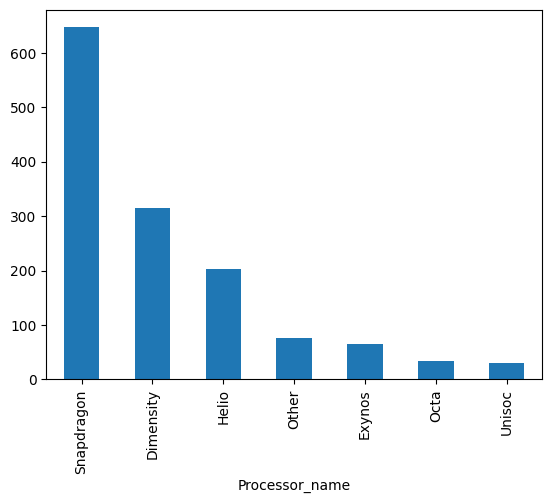

In [168]:
df1['Processor_name'].value_counts().plot(kind = 'bar')

## droping all unwanted columns and saving the data

In [169]:
df1.head(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory,cleaned_Inbuilt_memory,cleaned_fast_charging,total_px
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13.0,9999,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Exynos,Galaxy F14,Dual,1,1,1,4,6000,6.6,50,13,1000,128,25,2600640


In [170]:
df1.columns

Index(['Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery',
       'Display', 'Camera', 'External_Memory', 'Android_version', 'Price',
       'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution',
       'Processor_name', 'Model', 'sim_slot', 'network_3g', 'network_4g',
       'network_5g', 'cleaned_RAM', 'Battery_mAh', 'Display_inches',
       'rear_camera', 'front_camera', 'cleaned_External_Memory',
       'cleaned_Inbuilt_memory', 'cleaned_fast_charging', 'total_px'],
      dtype='object')

In [171]:
clean_data = df1.drop(['Name', 'No_of_sim', 'Ram', 'Battery','Display','Camera','External_Memory','Inbuilt_memory','fast_charging','Screen_resolution'], axis=1)

In [172]:
clean_data

,Rating,Spec_score,Android_version,Price,company,Processor_name,Model,sim_slot,network_3g,network_4g,network_5g,cleaned_RAM,Battery_mAh,Display_inches,rear_camera,front_camera,cleaned_External_Memory,cleaned_Inbuilt_memory,cleaned_fast_charging,total_px
0,4.65,68,13.0,9999,Samsung,Exynos,Galaxy F14,Dual,1,1,1,4,6000,6.6,50,13,1000,128,25,2600640
1,4.20,63,10.0,9990,Samsung,Octa,Galaxy A11,Dual,1,1,0,2,4000,6.4,13,8,512,32,15,1123200
2,4.30,75,12.0,11999,Samsung,Octa,Galaxy A13,Dual,1,1,0,4,5000,6.6,50,8,1000,64,25,2600640
3,4.10,73,12.0,11999,Samsung,Helio,Galaxy F23,Dual,1,1,0,4,6000,6.4,48,13,1000,64,47,1152000
4,4.10,69,11.0,11999,Samsung,Helio,Galaxy A03s,Dual,1,1,0,4,5000,6.5,13,5,1000,64,15,1152000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.05,75,12.0,18999,TCL,Dimensity,40R,Dual,1,1,1,4,5000,6.6,50,8,128,64,15,1160640
1366,4.10,80,14.0,24990,TCL,Dimensity,50 XL NxtPaper,Dual,1,1,0,8,5000,6.8,50,16,128,128,33,2880000
1367,4.00,80,13.0,23990,TCL,Dimensity,50 XE NxtPaper,Dual,1,1,1,6,5000,6.6,50,16,1000,256,18,1160640
1368,4.50,79,13.0,22499,TCL,Dimensity,40 NxtPaper,Dual,1,1,1,6,5000,6.6,50,8,1000,256,15,1160640


In [173]:
clean_data.to_csv('clean_data.csv', index=False)

## after eda data changes
- in company colunm except top 10 , covert other values in 'other'